In [8]:
import numpy as np
import pandas as pd

np.random.seed(23) 

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)

df = df.sample(40)

In [10]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


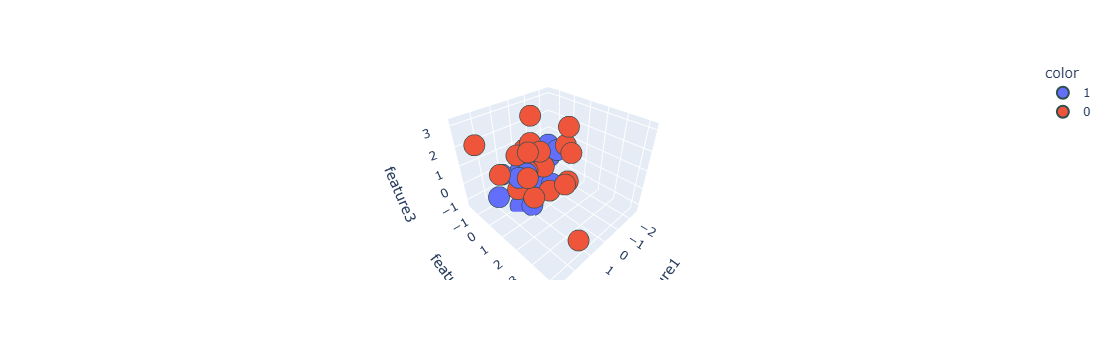

In [16]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [30]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [32]:
df.describe()

,feature1,feature2,feature3,target
count,40.000000,4.000000e+01,4.000000e+01,40.00000
mean,0.000000,-3.885781e-17,1.110223e-17,0.50000
std,1.012739,1.012739e+00,1.012739e+00,0.50637
min,-2.571350,-1.998011e+00,-1.749156e+00,0.00000
25%,-0.677239,-4.866010e-01,-6.815652e-01,0.00000
50%,-0.027094,-3.531748e-02,2.798692e-02,0.50000
75%,0.718191,5.677633e-01,4.687647e-01,1.00000
max,2.090049,3.557281e+00,2.182786e+00,1.00000


In [34]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [36]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [38]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [40]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

In [44]:
# Step 4 - Selecting our 2 most important principal components
pc = eigen_vectors[0:2]

In [58]:
# Step 5 - Taking the dot product of the principal components with the original data.

transformed_df = np.dot(df.iloc[:,0:3], pc.T)
# (40,3).(3,2)

new_df = pd.DataFrame(transformed_df, columns=['PC1', 'PC2'])
new_df['Target'] = df['target']

In [60]:
new_df.head()

,PC1,PC2,Target
0,0.599433,1.795862,1
1,1.056919,-0.212737,1
2,-0.271876,0.498222,1
3,-0.621586,0.023110,1
4,1.567286,1.730967,1


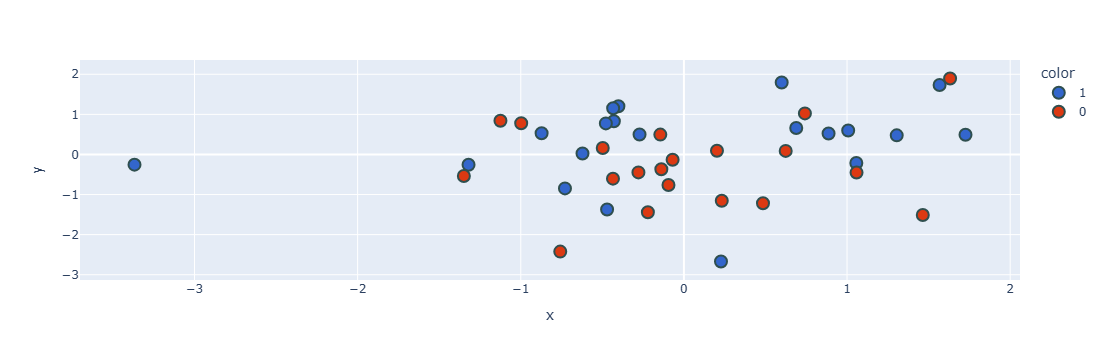

In [100]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                 selector=dict(mode='markers'))
fig.show()